In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./rainfall in india 1901-2015.csv')

def cleandata(area,starttime,endtime):
    cond1 = (df['SUBDIVISION']==area)
    cond2 = (df['YEAR']>=starttime)
    cond3 = (df['YEAR']<=endtime)
    
    data = df[cond1&cond2&cond3]
    data = data.drop(['SUBDIVISION','Jan-Feb','Mar-May','Jun-Sep','Oct-Dec','ANNUAL'],axis=1)
    data = data.melt(['YEAR']).reset_index()
    data = data[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])
    data.columns=['INDEX','YEAR','Month','rainfall']
    d={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,
       'OCT':10,'NOV':11,'DEC':12}
    data['Month']=data['Month'].map(d)
    data['Date']=pd.to_datetime(data.assign(Day=1).loc[:,['YEAR','Month','Day']])
    return data

location = 'HARYANA DELHI & CHANDIGARH'
years = []
for year in range(1905,2015,10):
    years.append(year)    
    

decable_data = []

for year in years:
    decable_data.append(cleandata(location,year,year+10))



In [3]:
def plotgraph(data):
    plt.rcParams['figure.figsize'] = (15, 6)
    plt.rcParams['axes.xmargin'] = 0.1
    x = data['Date']
    y = data['rainfall']
    plt.plot(x,y)
#     plt.scatter(x,y,color='green')
    plt.xlabel('Time')
    plt.ylabel('rainfall')
    plt.title('rainfall on monthly basis')
    plt.show()

In [4]:
def calcfftandplot(data):
    x = data['Date']
    y = data['rainfall']
    fft_y = np.fft.fft(y)
    fft_y_ = np.abs(fft_y)
    fft_y_power = np.abs(fft_y_)**2

    #1/120 coz its month
    freq = np.fft.fftfreq(len(x),1/120)

    plt.plot(freq,fft_y_power,'green')

    plt.xlabel('Freq')
    plt.ylabel('Amplitude/power')
    plt.title('fft of the rainfall')
    
    plt.show()
    return fft_y,freq


In [5]:
#plotting fft
# fft_y_  = np.abs(fft_y)
# plt.plot(freq,fft_y_**2)
# plt.plot(freq,(fft_y.real)**2,'yellow')

# plt.show()

# #plotting ifft
# ifft_data = np.fft.ifft(fft_y)
# time = data['Date']
# plt.plot(time, ifft_data.real)
# plt.xlabel('Time')
# plt.ylabel('Rainfall (mm)')
# plt.title('Inverse FFT of Indian Rainfall')
# plt.show()

In [6]:
# threshold = 1000000
# newarr = []
# newfft = np.array([])
# for a in range(len(fft_y)):
#     temp = abs(fft_y[a].real)**2
#     tempfft = fft_y[a]
#     if temp > threshold:
#         temp = 0
#         tempfft = 0 + 0j
        
#     newarr.append(temp)
#     newfft = np.append(newfft,tempfft)

# plt.plot(freq,(fft_y.real)**2,'red')
# plt.plot(freq,(newfft.real)**2,'yellow')
# plt.show()




In [7]:
# newifft = np.fft.ifft(newfft)
# ifft_y = np.fft.ifft(fft_y)

# plt.plot(time,newifft.real,'red')
# plt.plot(time,ifft_y.real,'green')
# plt.plot(time,data['rainfall'],'pink')

# plt.show()

# print(data)


In [8]:
def calcfft(signal):
    fft_y = np.fft.fft(signal)
    fft_y_ = np.abs(fft_y)
    fft_y_power = np.abs(fft_y_)**2

    #1/120 coz its month
    freq = np.fft.fftfreq(len(signal),1/120)

    plt.plot(freq,fft_y_power)

    plt.xlabel('Freq')
    plt.ylabel('Amplitude/power')
    plt.title('fft of the rainfall (removing the high frequency)')
    
    plt.show()
    return fft_y,freq

    
    


def plotforlowerfreq(fft_y,time,data,freq):
    threshold = 1000000
    newarr = []
    newfft = np.array([])
    for a in range(len(fft_y)):
        temp = abs(fft_y[a].real)**2
        tempfft = fft_y[a]
        if temp > threshold:
            temp = 0
            tempfft = 0 + 0j

        newarr.append(temp)
        newfft = np.append(newfft,tempfft)
    
    plt.xlabel('Freq')
    plt.ylabel('Amplitude/power')
    plt.title('fft of the rainfall (with high frequency removed)')    
    plt.plot(freq,np.abs(newfft.real)**2);
    plt.show();
    newifft = np.fft.ifft(newfft)
    ifft_y = np.fft.ifft(fft_y)
    
    plt.xlabel('Time')
    plt.ylabel('Rainfall (mm)')
    plt.title('Inverse FFT of Indian Rainfall (with high frequencies removed)')
    plt.plot(time,newifft.real,'red')
    plt.plot(time,ifft_y.real,'green')
    plt.plot(time,data['rainfall'],'pink')

    plt.show()
    
#     calcfft(newifft)
    
    

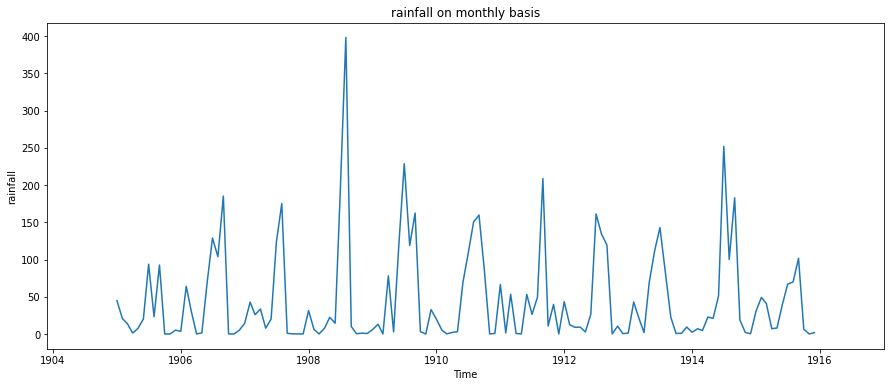

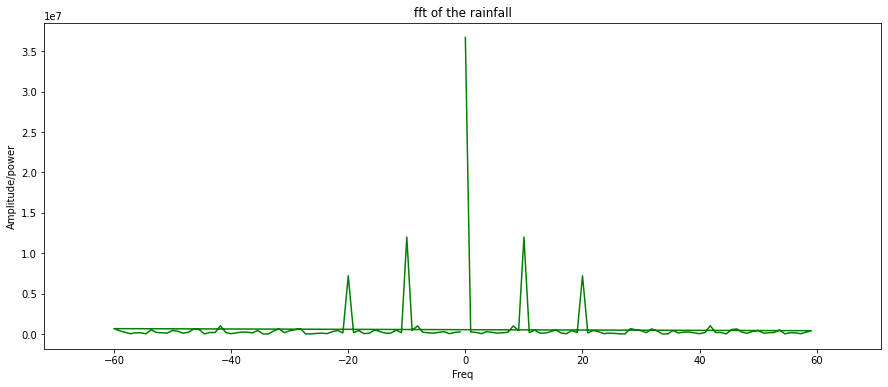

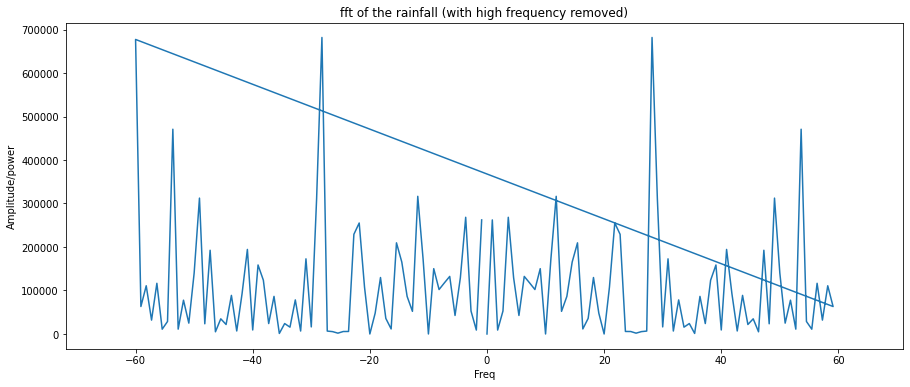

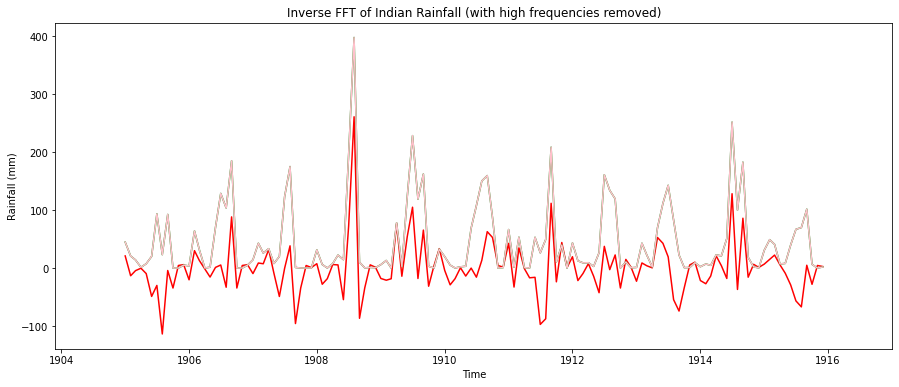

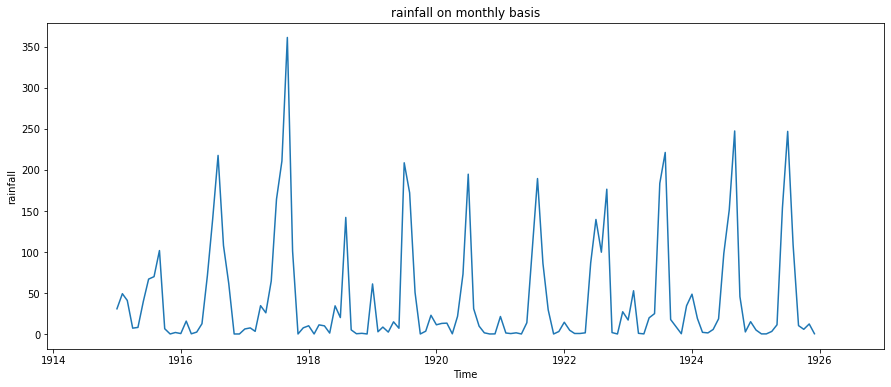

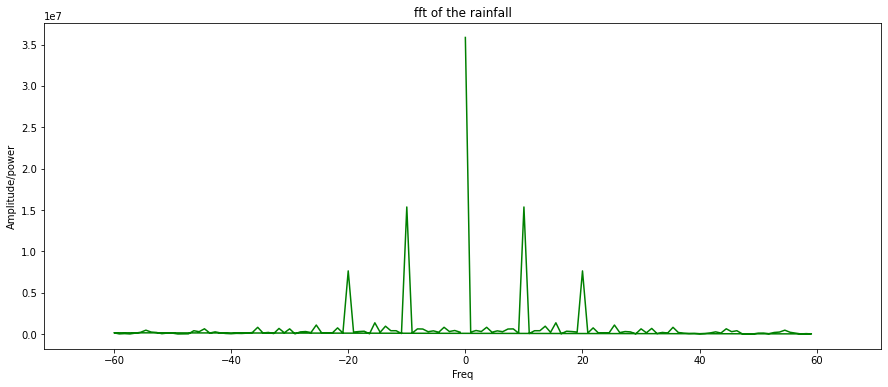

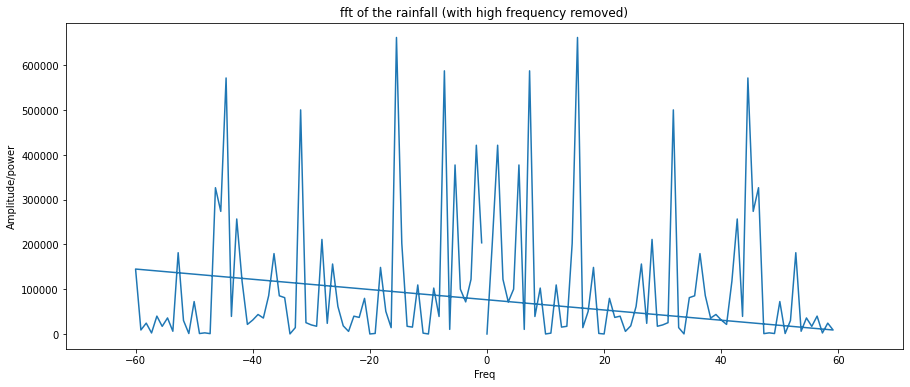

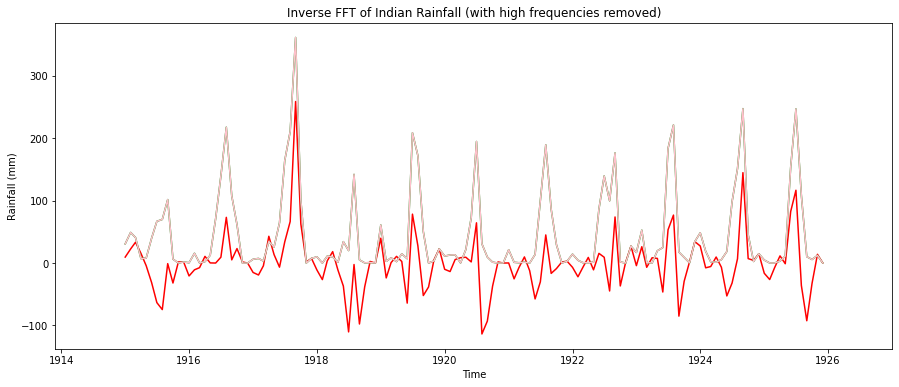

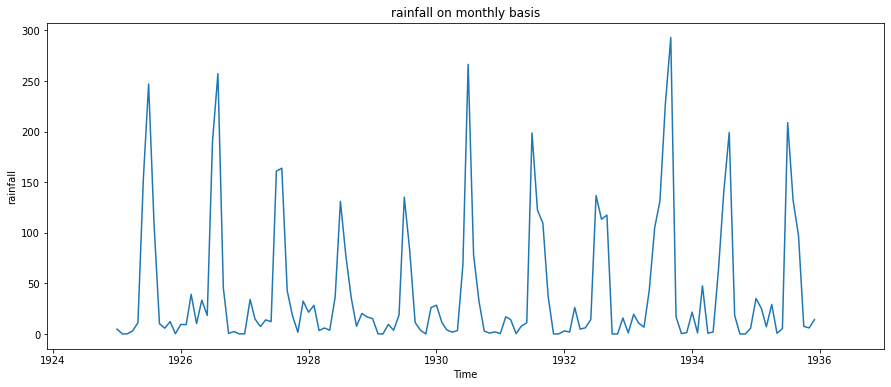

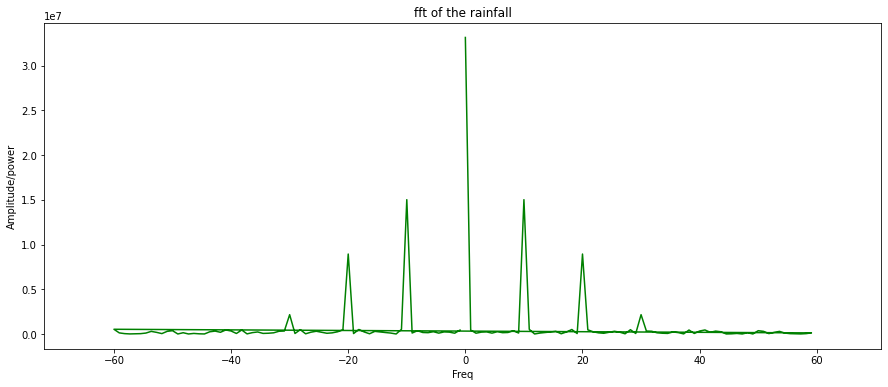

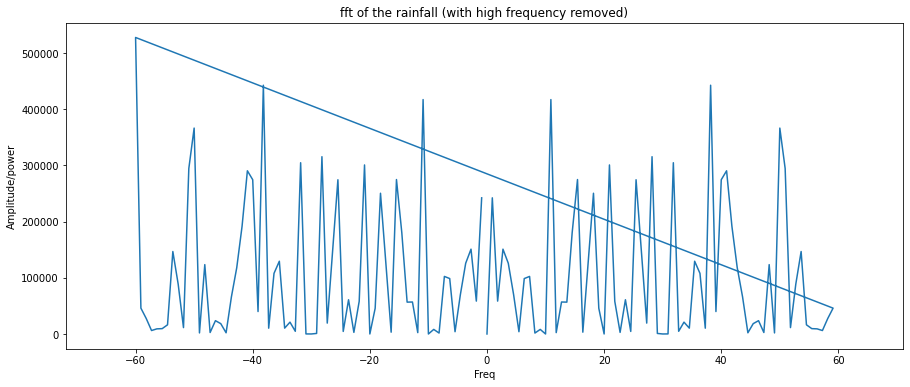

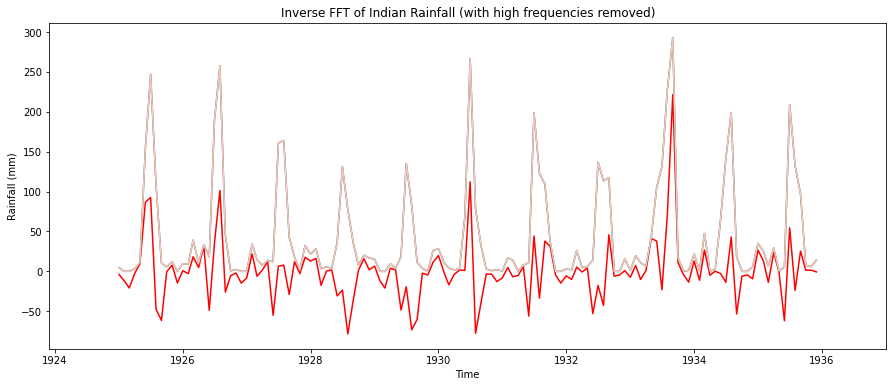

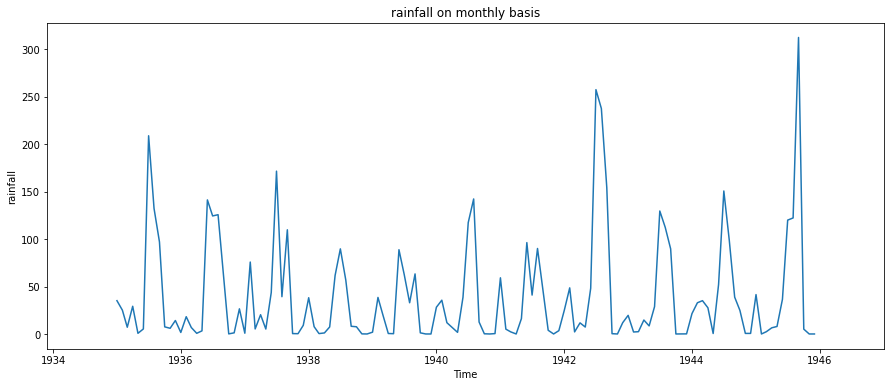

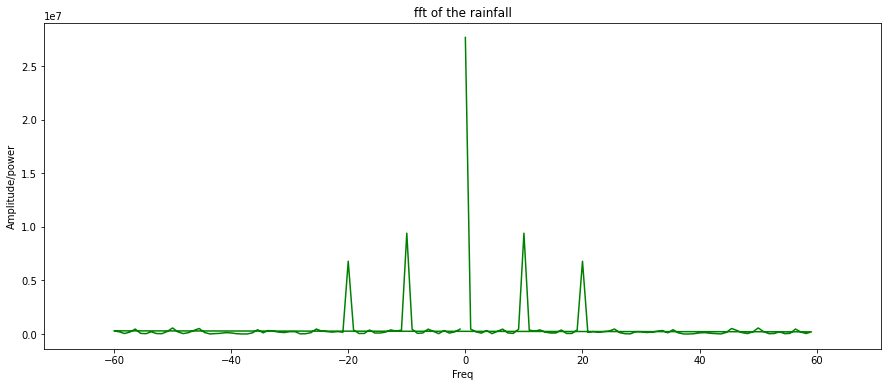

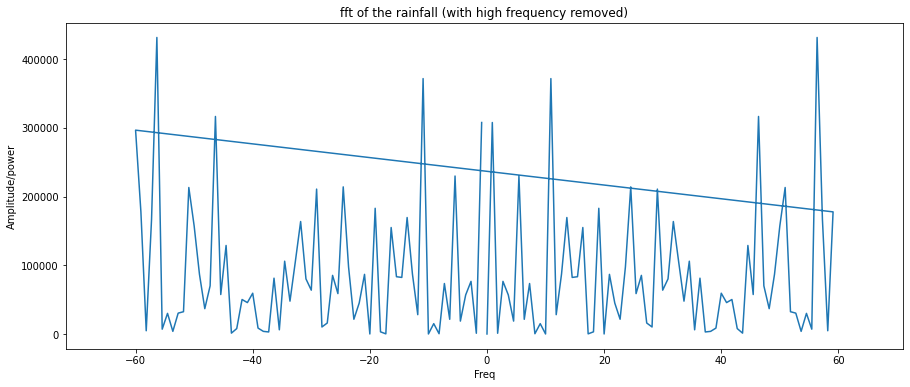

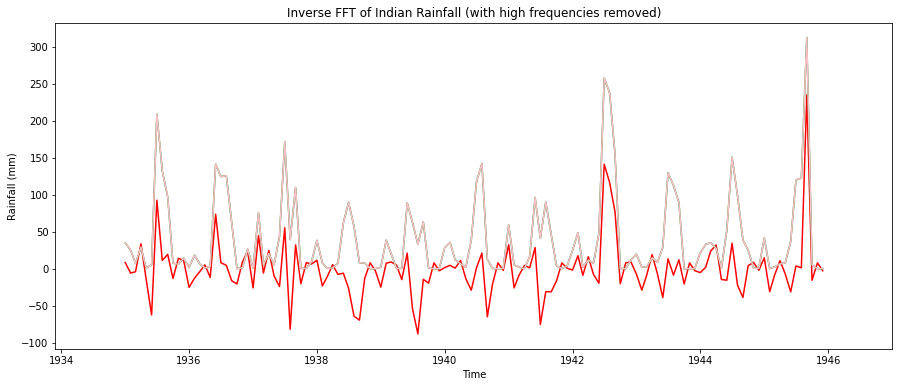

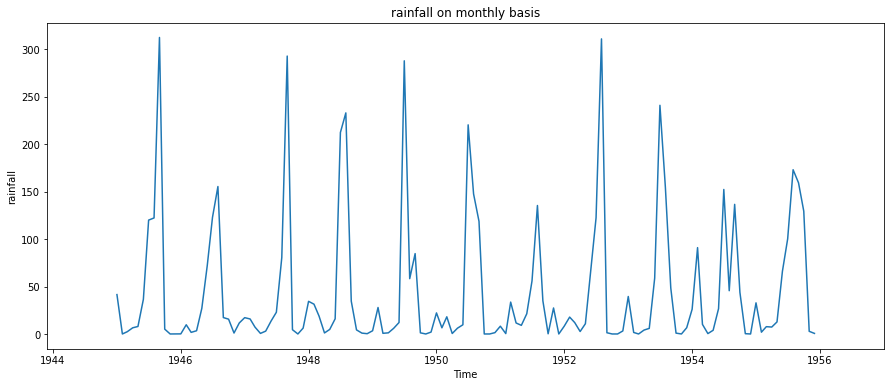

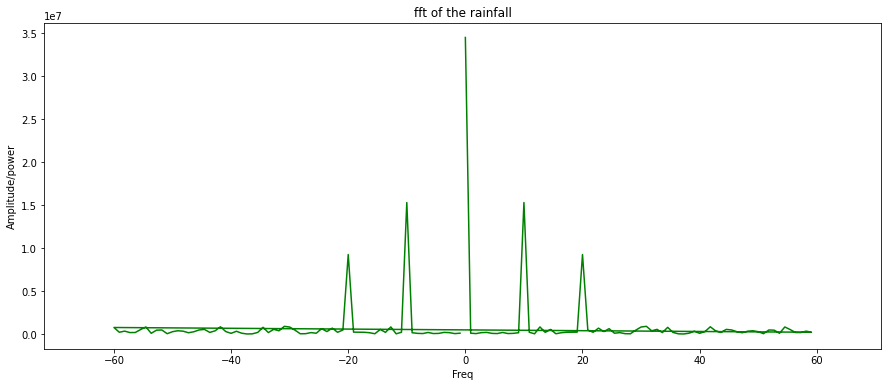

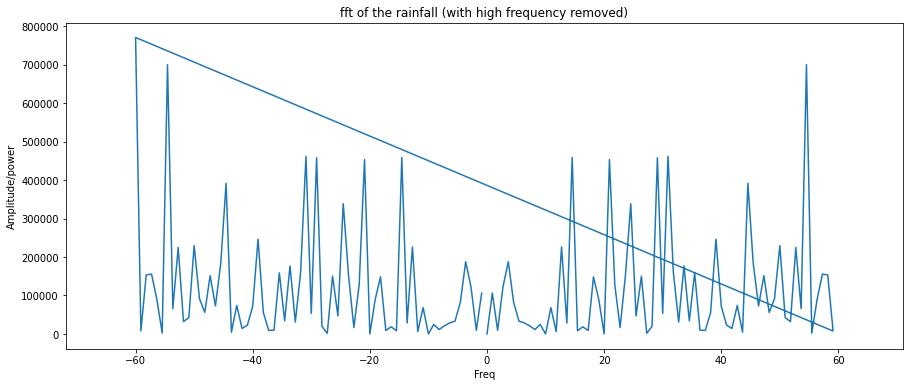

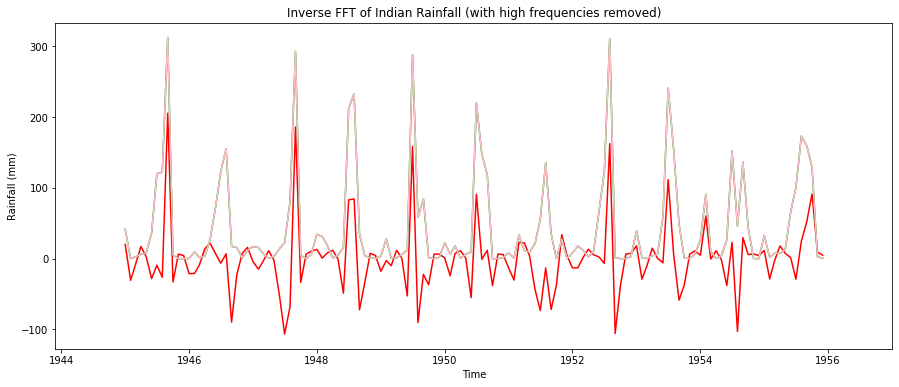

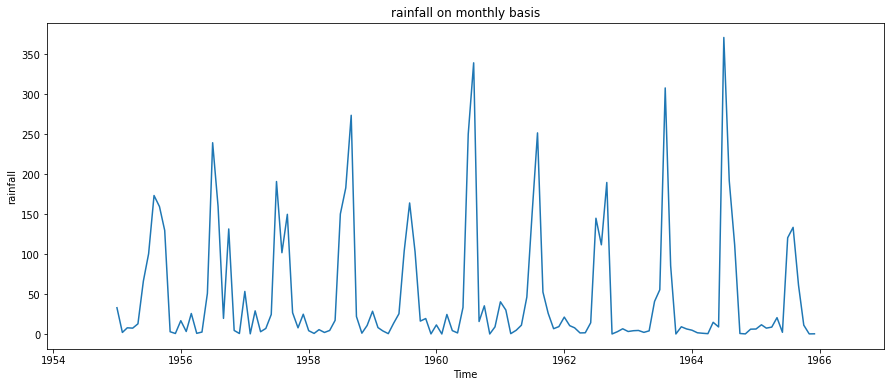

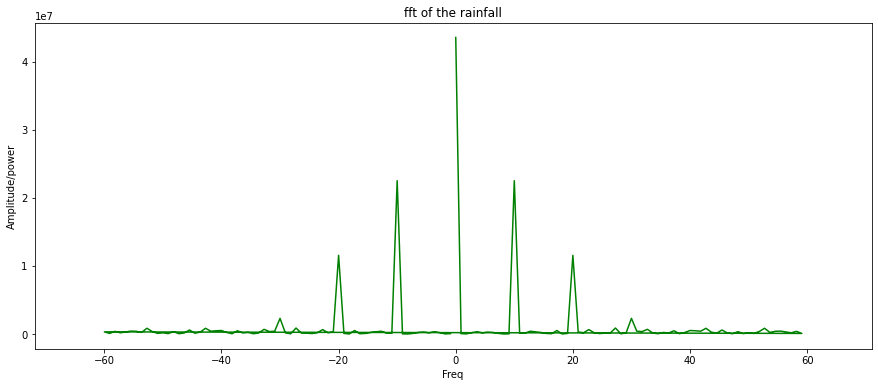

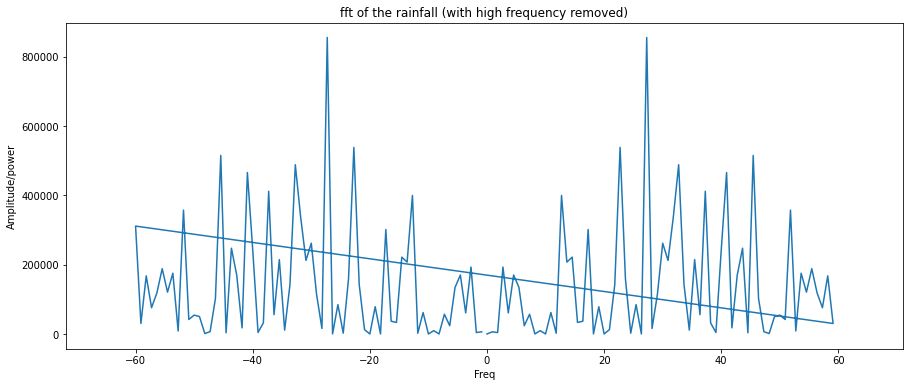

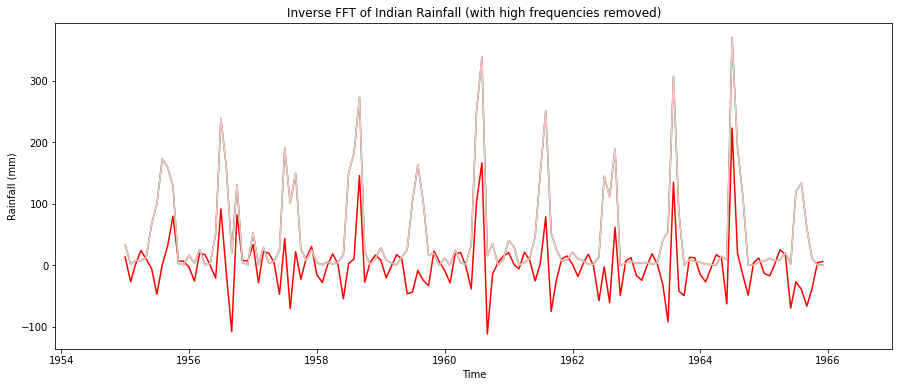

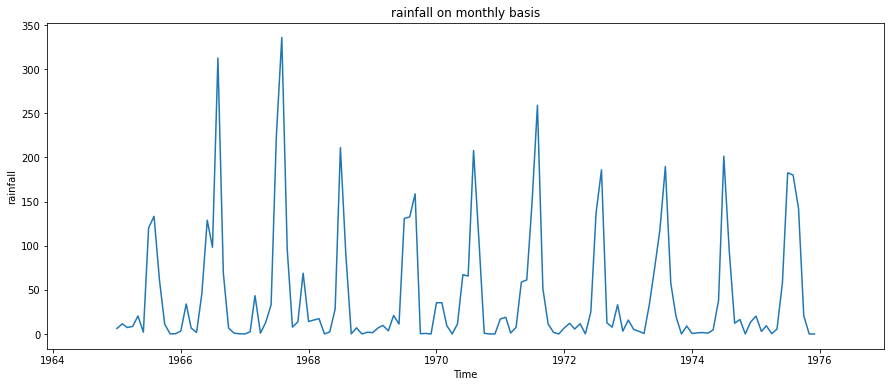

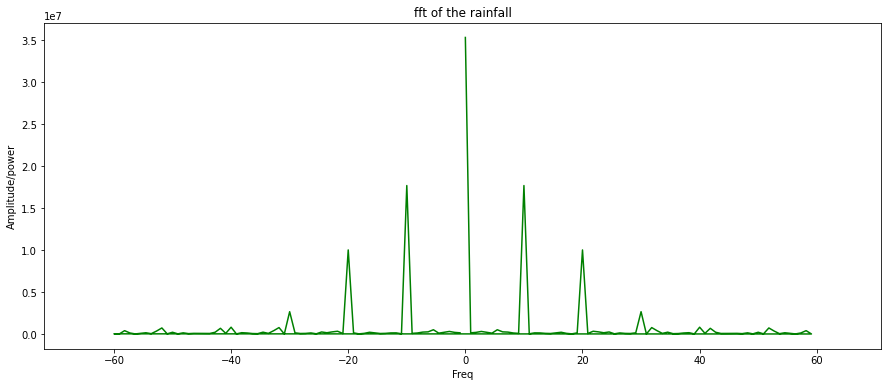

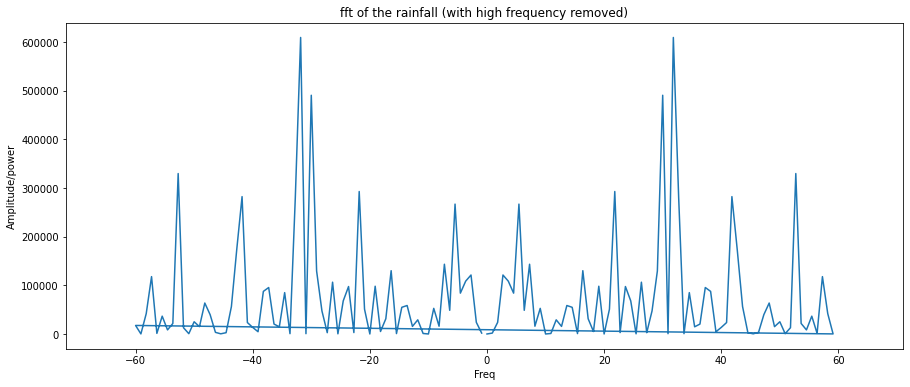

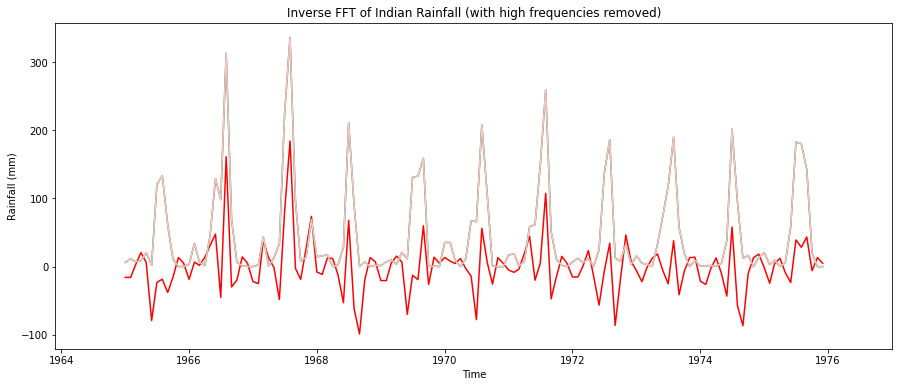

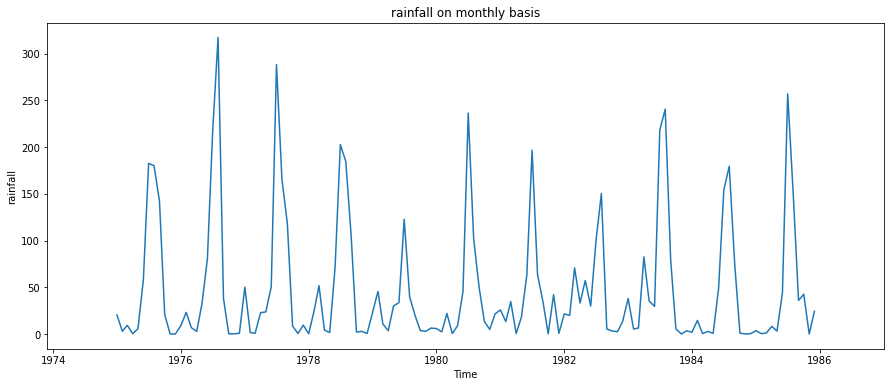

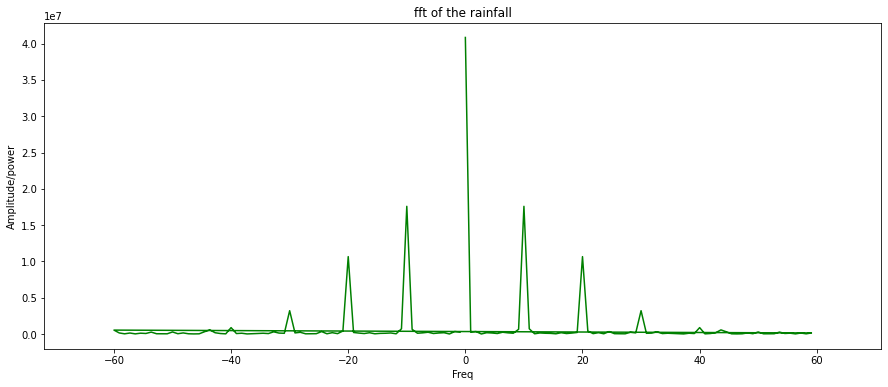

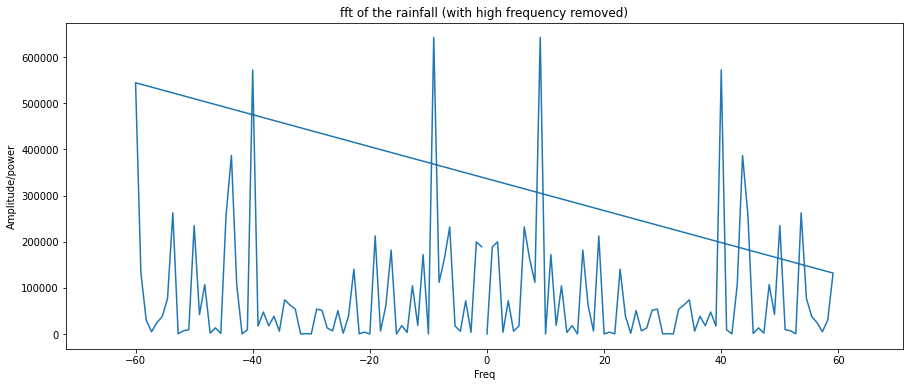

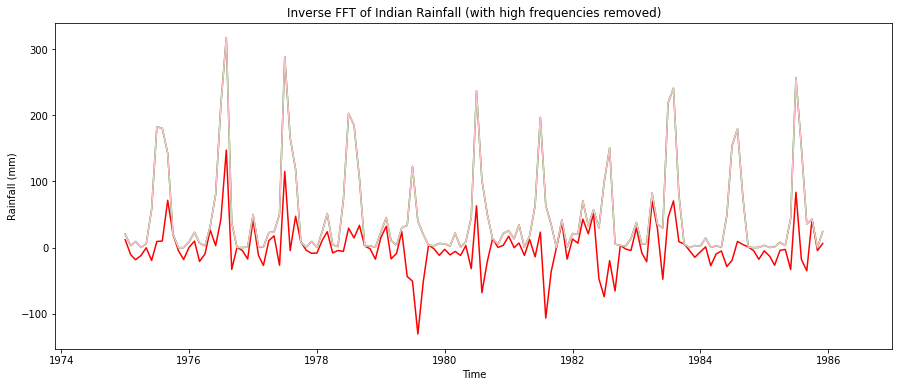

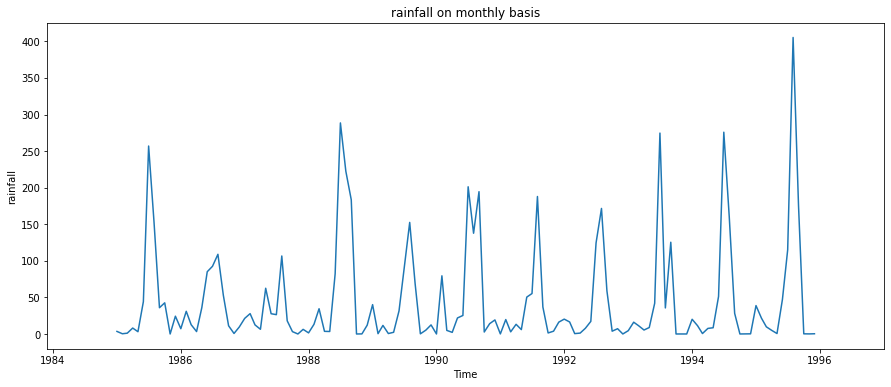

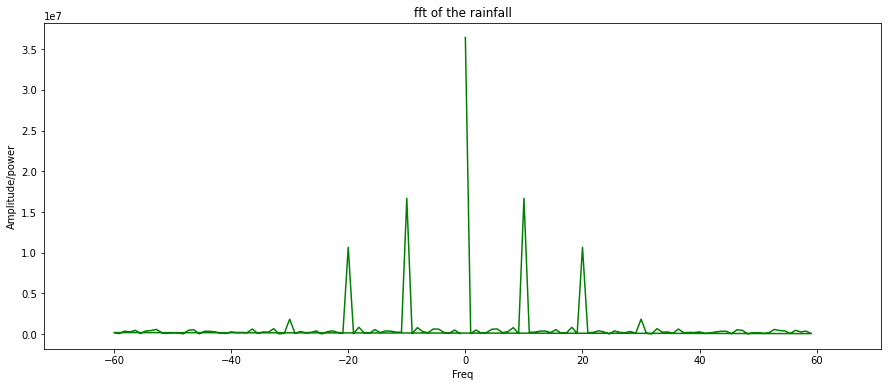

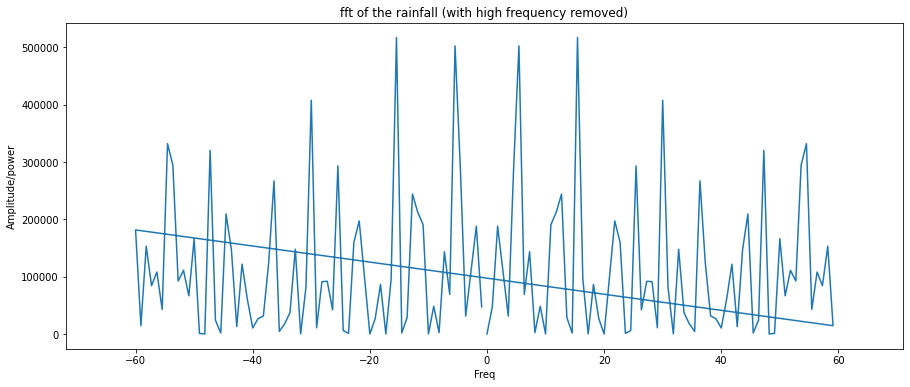

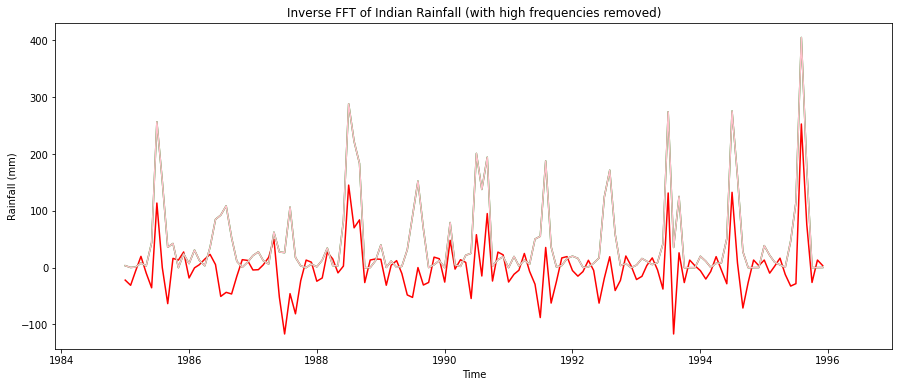

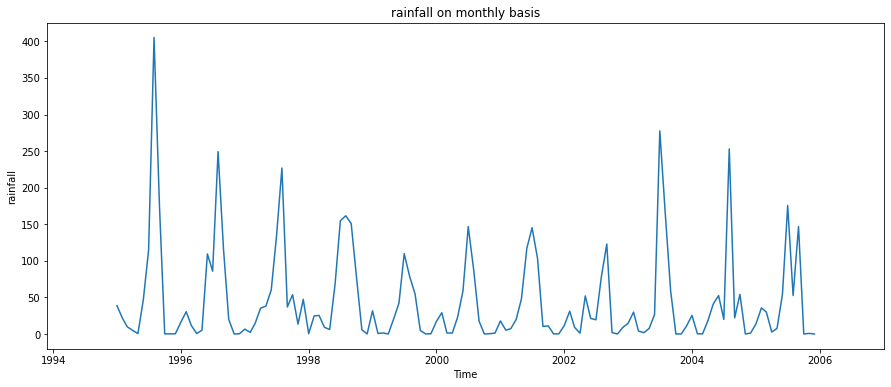

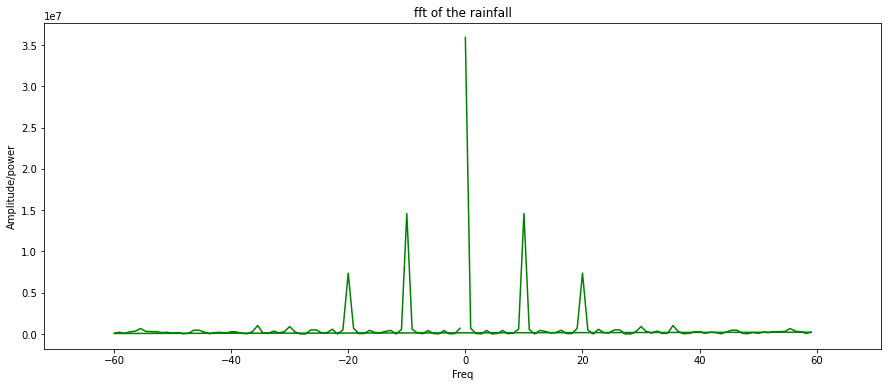

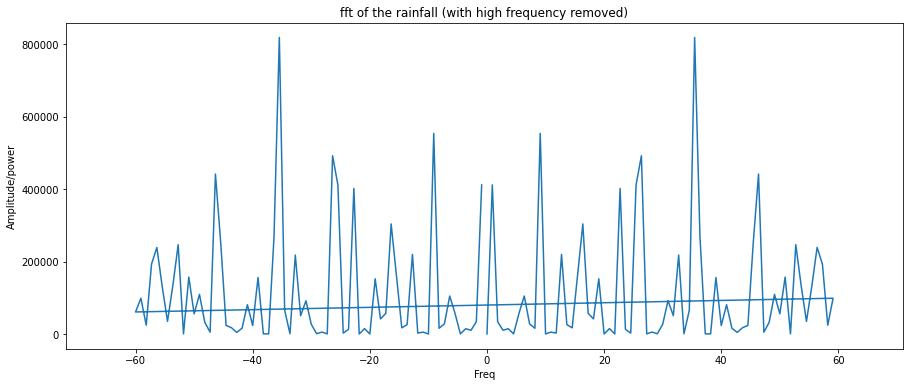

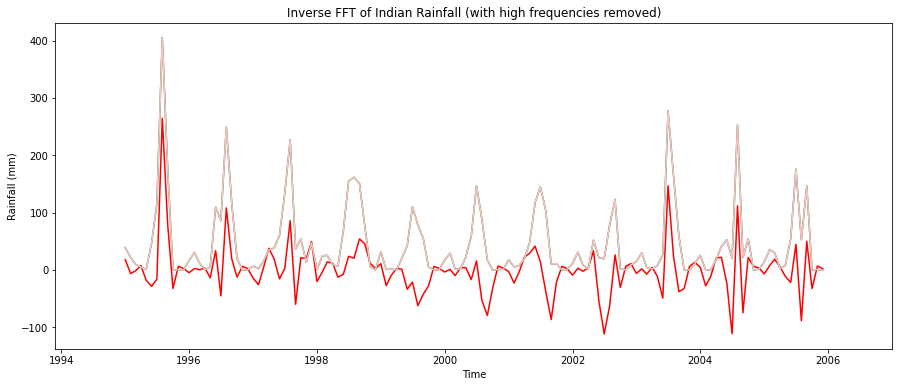

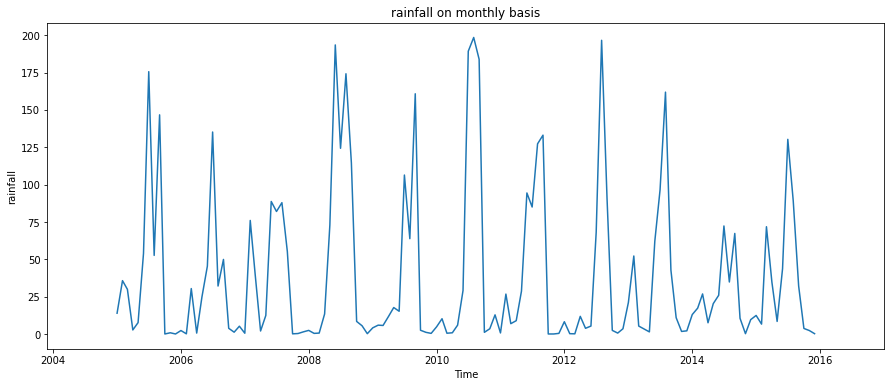

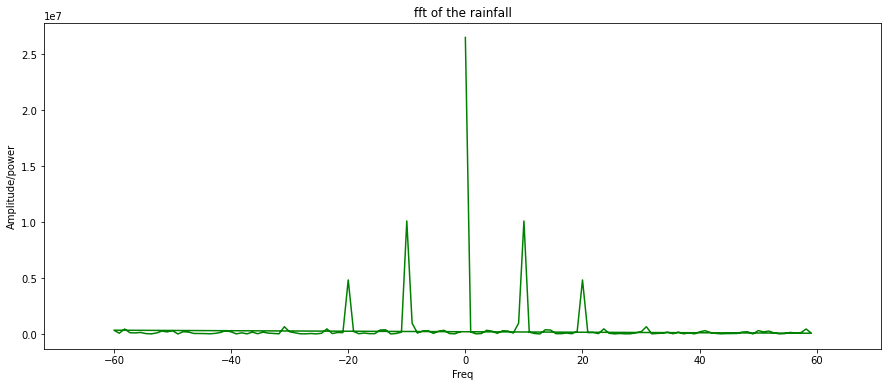

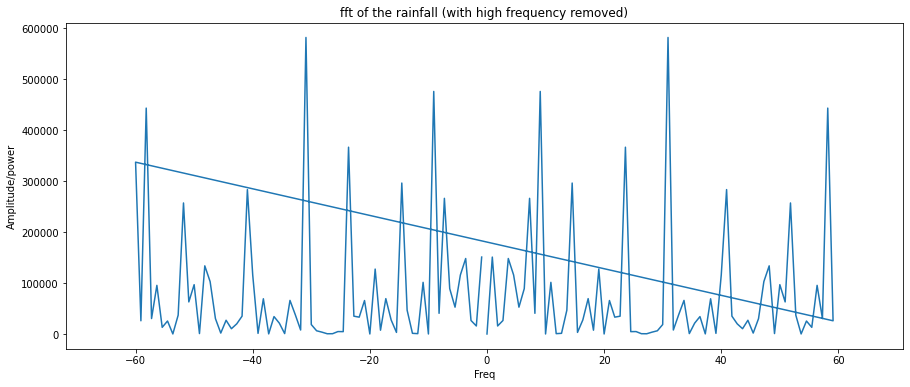

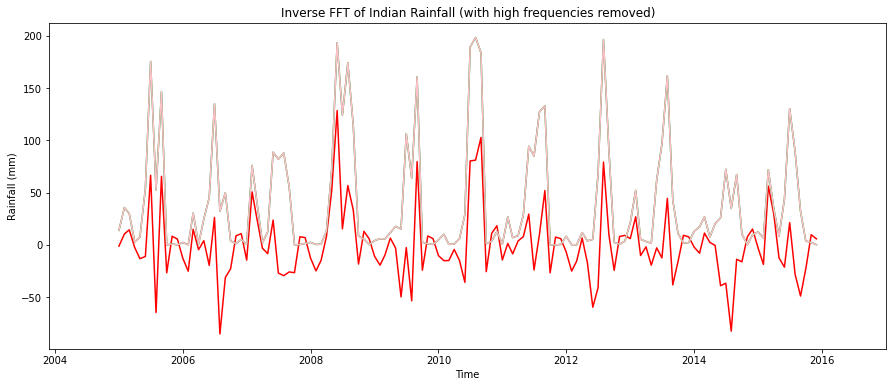

In [9]:
for a in decable_data:
    plotgraph(a)
    fft_y,freq = calcfftandplot(a)
    plotforlowerfreq(fft_y,a['Date'],a,freq)
    